In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [33]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()  # upload your file

# See the uploaded filenames
print(uploaded.keys())

# Use the correct key to read the file
filename = list(uploaded.keys())[0]  # takes the first uploaded file
data = pd.read_csv(io.BytesIO(uploaded[filename]), sep='\t')
data.head()


Saving data.tsv to data (5).tsv
dict_keys(['data (5).tsv'])


,text,tag
0,I love programming,positive
1,Python is amazing,positive
2,Machine learning is fascinating,positive
3,I hate bugs,negative
4,Debugging is frustrating,negative


In [43]:
X = data["text"]
y = data["tag"]

In [44]:
le = LabelEncoder()
y = le.fit_transform(y)

In [45]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
seq = LogisticRegression()
seq.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = seq.predict(X_test)

In [49]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.5
Precision: 0.25
Recall: 0.5
F1 Score: 0.3333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

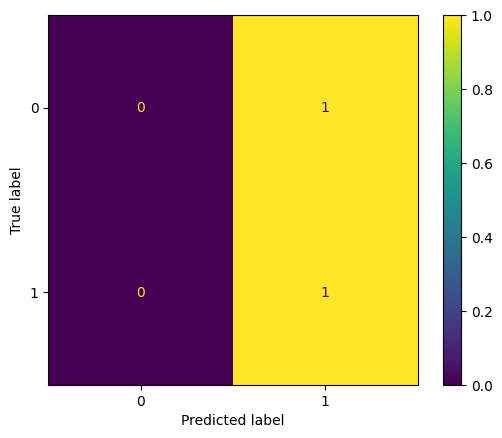

In [50]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [51]:
y_probs = seq.predict_proba(X_test)[:,1]

In [ ]:
mask = (y==0) | (y==1)
y = y[mask]

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.0


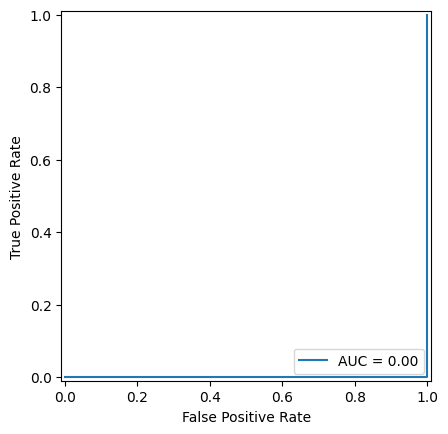

In [53]:
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()